In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from tqdm import tqdm
import os
import time

import math
import logging 

import random
import pickle
import warnings
import gc
CHUNKSIZE = 50000

import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight') 
%matplotlib inline

warnings.filterwarnings(action='ignore')
#pd.set_option('mode.chained_assignment',  None) # 경고 off

In [3]:
import scipy as sci
from imblearn import under_sampling, over_sampling, combine
from sklearn.decomposition import PCA


#import catboost as cb
import xgboost as xgb

from scipy.stats import spearmanr
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from hyperopt import hp, tpe, Trials, STATUS_OK
from hyperopt import fmin


from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,  roc_auc_score, classification_report, precision_recall_curve, balanced_accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_validate, cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score, accuracy_score,precision_score, recall_score, auc


from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.metrics import classification_report_imbalanced

from imblearn.combine import SMOTEENN
from imblearn.under_sampling import *
from imblearn.ensemble import BalancedBaggingClassifier 

In [5]:
import optuna
from optuna import Trial, visualization

In [ ]:
## rows 500

pd.set_option('display.max_rows', 500)

## columns

pd.set_option('display.max_columns', 500)

pd.set_option('display.width', 1000)

In [6]:
import os
display(os.getcwd())
display(os.listdir())

'/home/clim-lab/바탕화면/main_drive/jiwon/workspace/business_programming'

['assignment#1.ipynb',
 'supermarket_sales.csv',
 'assignment#2.ipynb',
 '.ipynb_checkpoints',
 'telecom_churn.csv']

In [7]:
def loaddata(fname:str, chunksize:int, dtype:dict=None, columns:list=None):  
    df = pd.DataFrame()
    for chunk in tqdm(pd.read_csv(fname, engine='python', low_memory=True, chunksize=chunksize)):
        df = pd.concat([df, chunk], axis=0)
        del chunk
        gc.collect()
    return df

In [8]:
def viewinfo(df:pd.DataFrame) -> None:
    print(df.shape)
    print()
    df.info()
    print()
    display(df.head())

In [9]:
telecom= loaddata('telecom_churn.csv',chunksize=CHUNKSIZE)

1it [00:00,  6.58it/s]


In [8]:
supermarket=loaddata('supermarket_sales.csv',chunksize=CHUNKSIZE)

1it [00:00, 16.44it/s]


In [9]:
display(telecom)
display(supermarket)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


-----

### Q1. telecom_churn.csv 
**churn rate 가입 해지율**


 a) Please provide any useful information (e.g., figures, tables, etc.) to understand the telecom market.  
Please address why such figures and tables are of particular interest to your boss or clients.    

b) Please built various models to predict customers’ churn rates and choose the best one for the test set.    
Also, justify why your model is better and more useful than other models.    
 
c) Given the results from a-b), please offer strategic implications for automobile brands.  

Dataset Description  
• State : US states of residence   
• Account length : # of days since a customer subscribed the service   
• Area code : telephone area code    
• International plan : subscribe International plan   
• Voice mail plan : subscribe Voice plan   
• Number vmail messages : # of voice mail received per day    
• Total day/evening/night minutes : # of minutes of using a phone during day/evening/night time    
• Total day/evening/night calls: # of calls received during day/evening/night time   
• Total day/evening/night charge: amount of charges made during day/evening/night time   
• Total intl minutes : # of minutes of using international calls    
• Total intl calls : # of international calls     
• Total intl charge : amount of charges of using international calls     
• Customer service calls : # of calls made at Customer service center    
• Churn : canceled the subscription       

In [76]:
import sweetviz as sv

In [81]:
my_report = sv.analyze(telecom, target_feat = 'Churn')
my_report.show_html('./telecom_churn.html')

                                             |      | [  0%]   00:00 -> (? left)

Report ./telecom_churn.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [32]:
telecom[telecom['Churn']==1].head().T

,10,15,21,33,41
State,IN,NY,CO,AZ,MD
Account length,65,161,77,12,135
Area code,415,415,408,408,408
International plan,No,No,No,No,Yes
Voice mail plan,No,No,No,No,Yes
Number vmail messages,0,0,0,0,41
Total day minutes,129.1,332.9,62.4,249.6,173.1
Total day calls,137,67,89,118,85
Total day charge,21.95,56.59,10.61,42.43,29.43
Total eve minutes,228.5,317.8,169.9,252.4,203.9


In [9]:
telecom['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

In [28]:
def dtype_memory(data):
    for column in data.columns:
        try:
            if data[column].dtype == 'float64':
                data[column] = data[column].astype(np.float32)
        except:
            pass
        
    return data

In [10]:
viewinfo(telecom)

(3333, 20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [226]:
telecom.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

-----
### 1. EDA

In [34]:
# for i in telecom.columns:
#     print("---- %s ---" % i)
#     print(telecom[i].value_counts())


for i in telecom.columns: 
    display(telecom[i].value_counts().to_frame())

,State
WV,106
MN,84
NY,83
AL,80
WI,78
OH,78
OR,78
WY,77
VA,77
CT,74


,Account length
105,43
87,42
101,40
93,40
90,39
...,...
243,1
200,1
232,1
5,1


,Area code
415,1655
510,840
408,838


,International plan
No,3010
Yes,323


,Voice mail plan
No,2411
Yes,922


,Number vmail messages
0,2411
31,60
29,53
28,51
33,46
27,44
30,44
24,42
26,41
32,41


,Total day minutes
154.0,8
159.5,8
174.5,8
183.4,7
175.4,7
...,...
78.6,1
200.9,1
254.3,1
247.0,1


,Total day calls
102,78
105,75
95,69
107,69
104,68
...,...
149,1
163,1
30,1
165,1


,Total day charge
26.18,8
27.12,8
29.67,8
31.18,7
29.82,7
...,...
13.36,1
34.15,1
43.23,1
41.99,1


,Total eve minutes
169.9,9
167.2,7
180.5,7
201.0,7
161.7,7
...,...
75.3,1
293.9,1
232.8,1
173.2,1


,Total eve calls
105,80
94,79
108,71
102,70
97,70
...,...
49,1
37,1
164,1
42,1


,Total eve charge
14.25,11
16.12,11
15.90,10
17.09,9
18.62,9
...,...
7.85,1
8.63,1
26.54,1
6.74,1


,Total night minutes
191.4,8
210.0,8
188.2,8
197.4,8
214.6,8
...,...
142.0,1
254.8,1
111.5,1
260.7,1


,Total night calls
105,84
104,78
91,76
102,72
100,69
...,...
149,1
158,1
44,1
46,1


,Total night charge
9.66,15
9.45,15
8.47,14
8.88,14
7.69,13
...,...
15.97,1
14.46,1
14.03,1
3.20,1


,Total intl minutes
10.0,62
11.3,59
9.8,56
10.9,56
10.1,53
...,...
2.7,1
18.9,1
17.2,1
1.3,1


,Total intl calls
3,668
4,619
2,489
5,472
6,336
7,218
1,160
8,116
9,109
10,50


,Total intl charge
2.70,62
3.05,59
2.65,56
2.94,56
2.73,53
...,...
0.73,1
5.10,1
4.64,1
0.35,1


,Customer service calls
1,1181
2,759
0,697
3,429
4,166
5,66
6,22
7,9
9,2
8,2


,Churn
False,2850
True,483


In [62]:
churn_No = telecom[telecom["Churn"] == False]['International plan'].value_counts()
Churn_Yes = telecom[telecom["Churn"] == True]['International plan'].value_counts()
df = pd.DataFrame([churn_No, Churn_Yes])
#df.index["No","Yes"]
print(df)

                      No  Yes
International plan  2664  186
International plan   346  137


                      No  Yes
International plan  2664  186
International plan   346  137


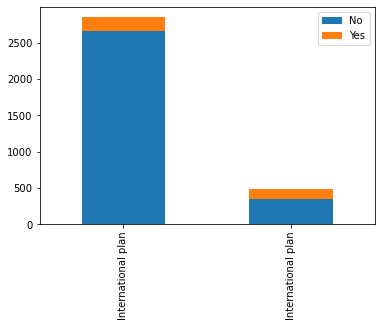

In [67]:
def show(feature):
    churn_No = telecom[telecom["Churn"] == False][feature].value_counts()
    Churn_Yes = telecom[telecom["Churn"] == True][feature].value_counts()
    df = pd.DataFrame([churn_No, Churn_Yes])
    df.index = ["No", "Yes"]
    print(df)
    df.plot(kind="bar", stacked=True)
###

show('International plan')

In [11]:
def categoric_graph(col_names, col_num, row_num, hue_col):
    col_num=col_num
    row_num=row_num
    fig, ax = plt.subplots(ncols=col_num, nrows=row_num, figsize=(20,row_num*5))
    
    for i, col in enumerate(col_names):
        sns.countplot(x=col, hue=hue_col ,palette='Set2', data=telecom, ax=ax[int(i/col_num)])
    
    return

In [12]:
telecom['International plan'].value_counts()

No     3010
Yes     323
Name: International plan, dtype: int64

None

None

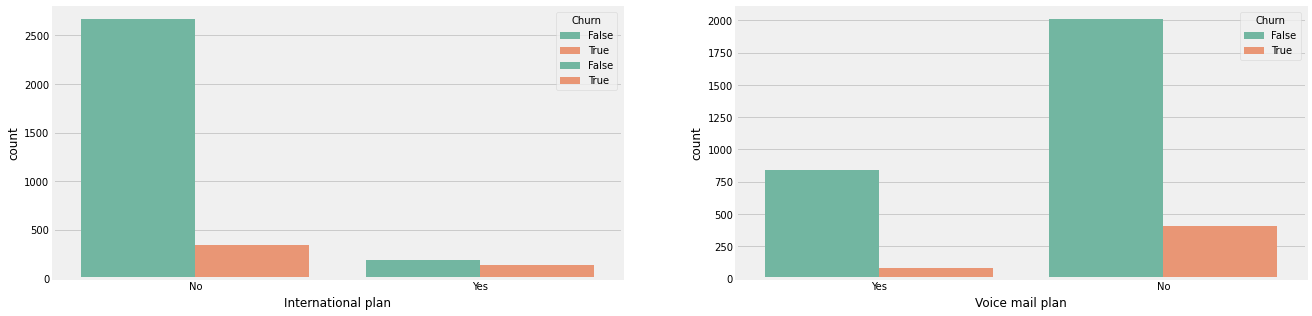

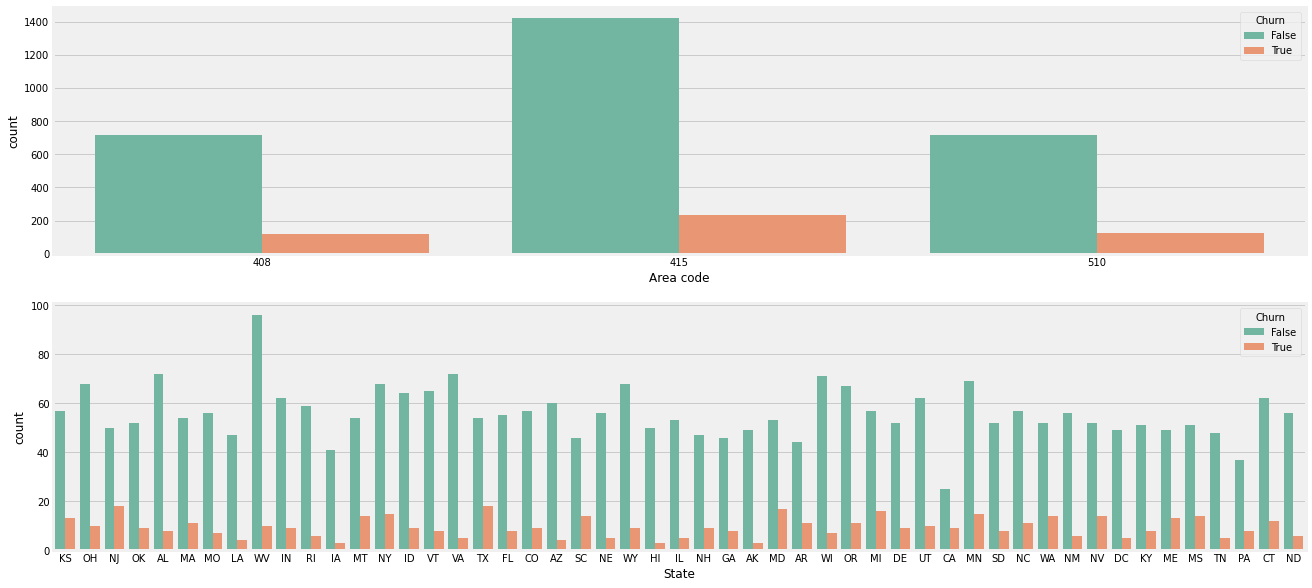

In [14]:
categorical_col=['State','International plan','Voice mail plan']

display(categoric_graph(categorical_col, 2,1, 'Churn'))
display(categoric_graph(['Area code','State'], 1,2, 'Churn'))

In [15]:
categorical_col=['State','International plan','Voice mail plan','Area code']
continuous_col = list(set(telecom.columns.tolist())-set(categorical_col))
continuous_col

['Total intl charge',
 'Total intl calls',
 'Total night charge',
 'Churn',
 'Number vmail messages',
 'Total night calls',
 'Total day minutes',
 'Total intl minutes',
 'Total day charge',
 'Total day calls',
 'Account length',
 'Total eve calls',
 'Total eve minutes',
 'Total night minutes',
 'Total eve charge',
 'Customer service calls']

In [16]:
def continuous_graph(col_names, col_num, row_num):
    col_num=col_num
    row_num=row_num
    fig, ax = plt.subplots(ncols=col_num, nrows=row_num, figsize=(20,row_num*5))
    
    for i, col in enumerate(col_names):
        sns.distplot(telecom[col], bins=20, ax=ax[int(i/col_num),int(i%col_num)])
        
    return

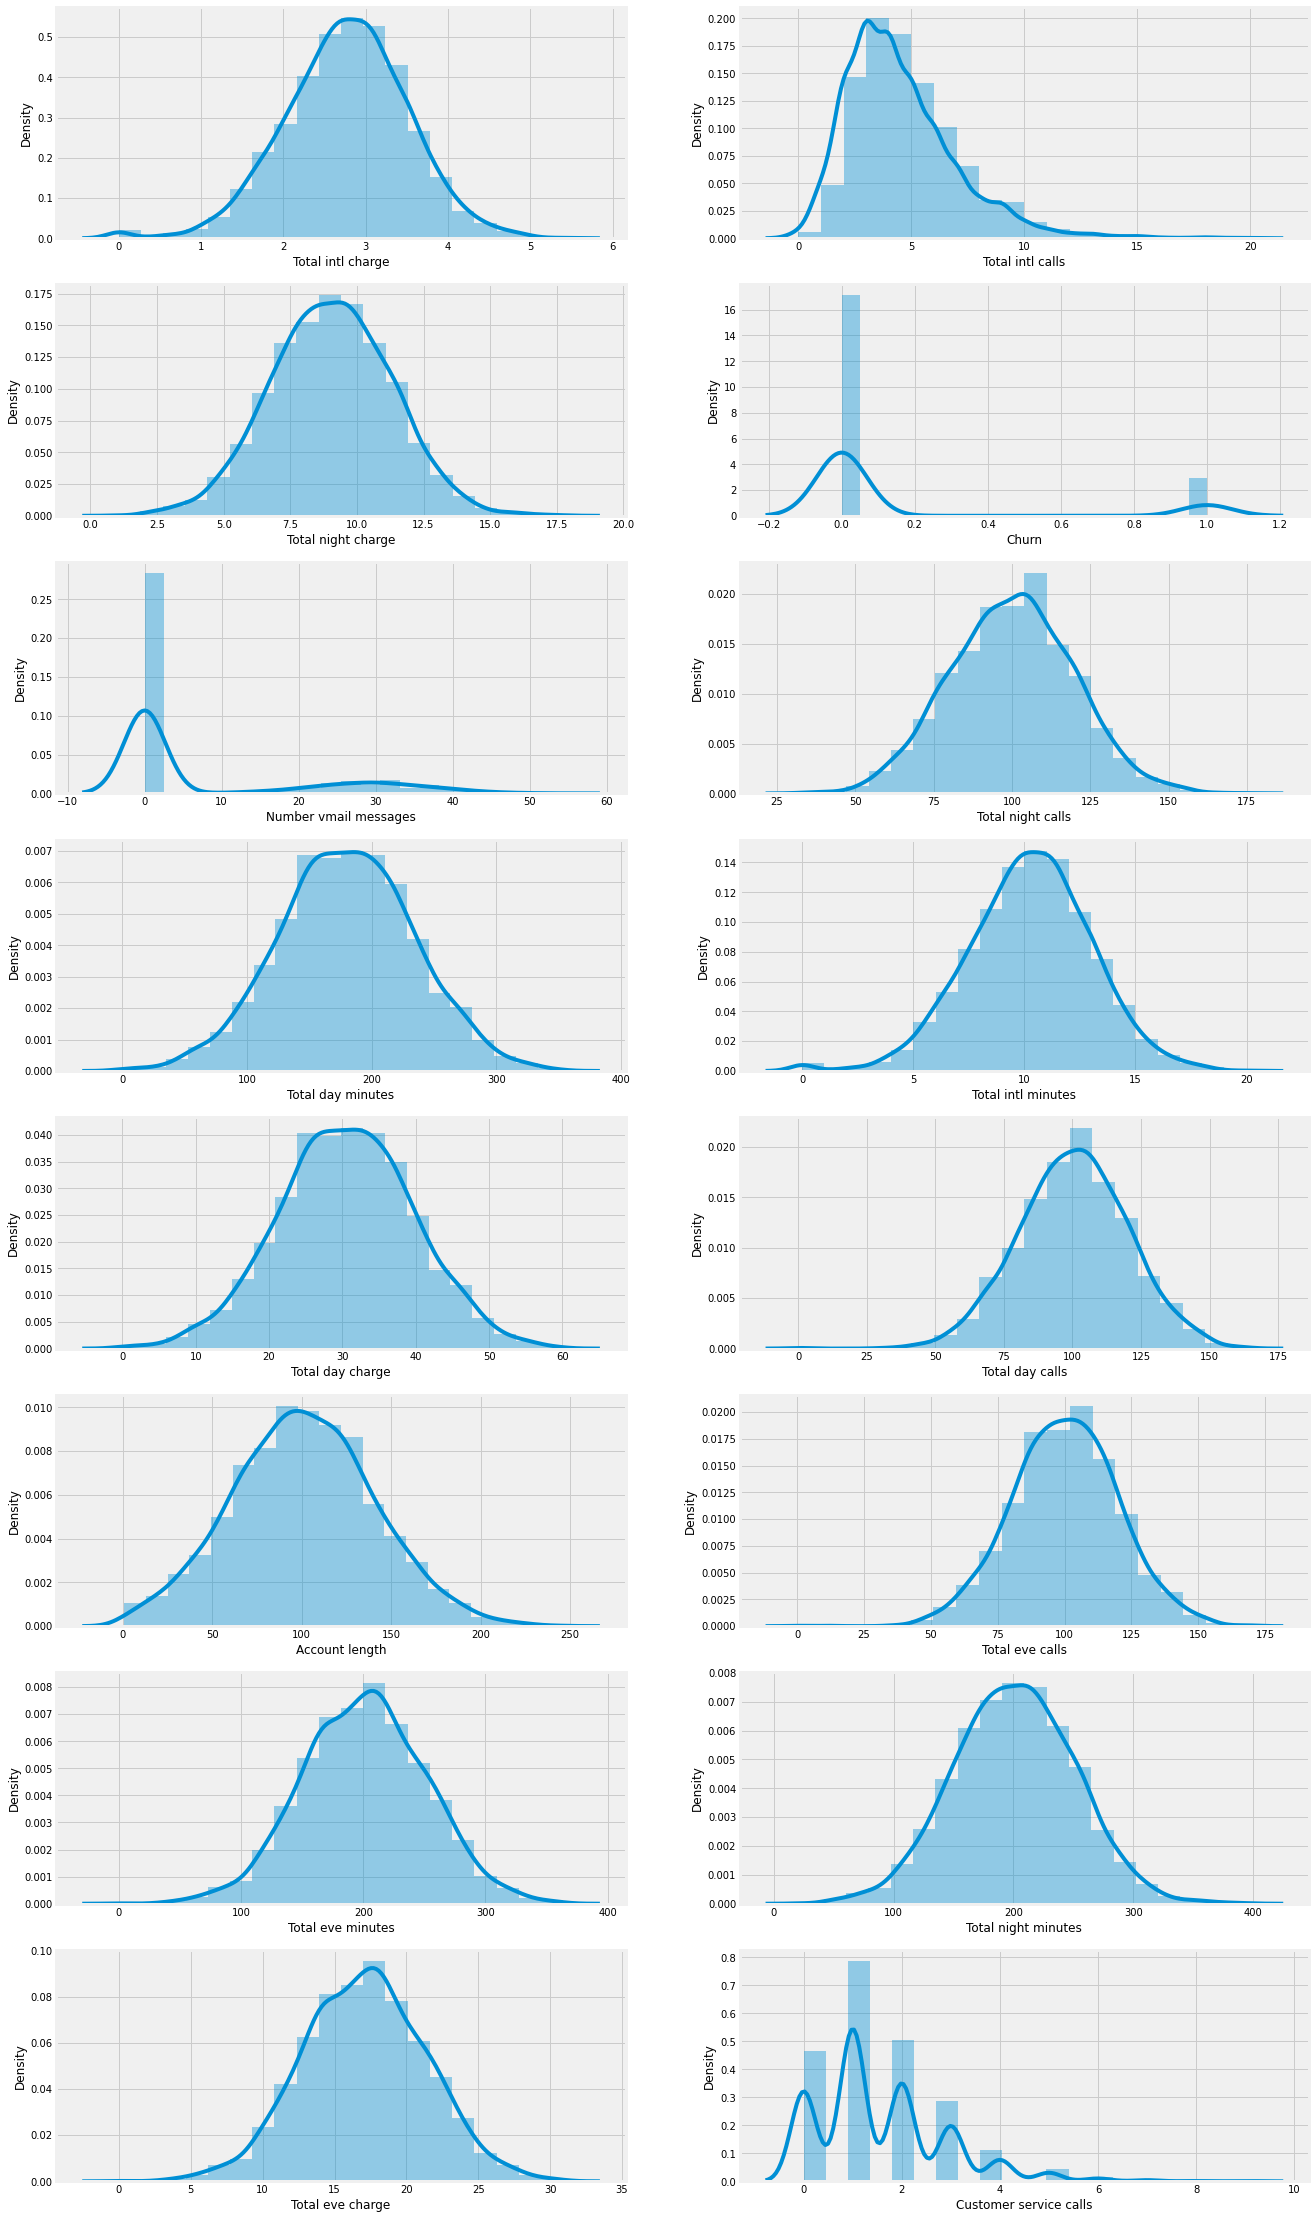

In [17]:
continuous_graph(continuous_col, 2,8)

### Churn 0 1 에 따른 displot 그리기

In [96]:
telecom.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [59]:
# Creating churn dataframe
data_churn = telecom[telecom['Churn'] == 1]
# Creating not churn dataframe
data_non_churn = telecom[telecom['Churn'] == 0]

continuous_col.remove('Churn')

In [74]:
def churn_check(col_names, col_num, row_num):
    col_num=col_num
    row_num=row_num
    fig, ax = plt.subplots(ncols=col_num, nrows=row_num, figsize=(20,row_num*5))
    
    for i, col in enumerate(col_names):
        sns.distplot(data_churn[col], label='churn', hist=False, bins=20, ax=ax[int(i/col_num), int(i%col_num)])
        sns.distplot(data_non_churn[col], label='not churn', hist=False, ax=ax[int(i/col_num),int(i%col_num)])  
        plt.legend(title="Churn")
    return

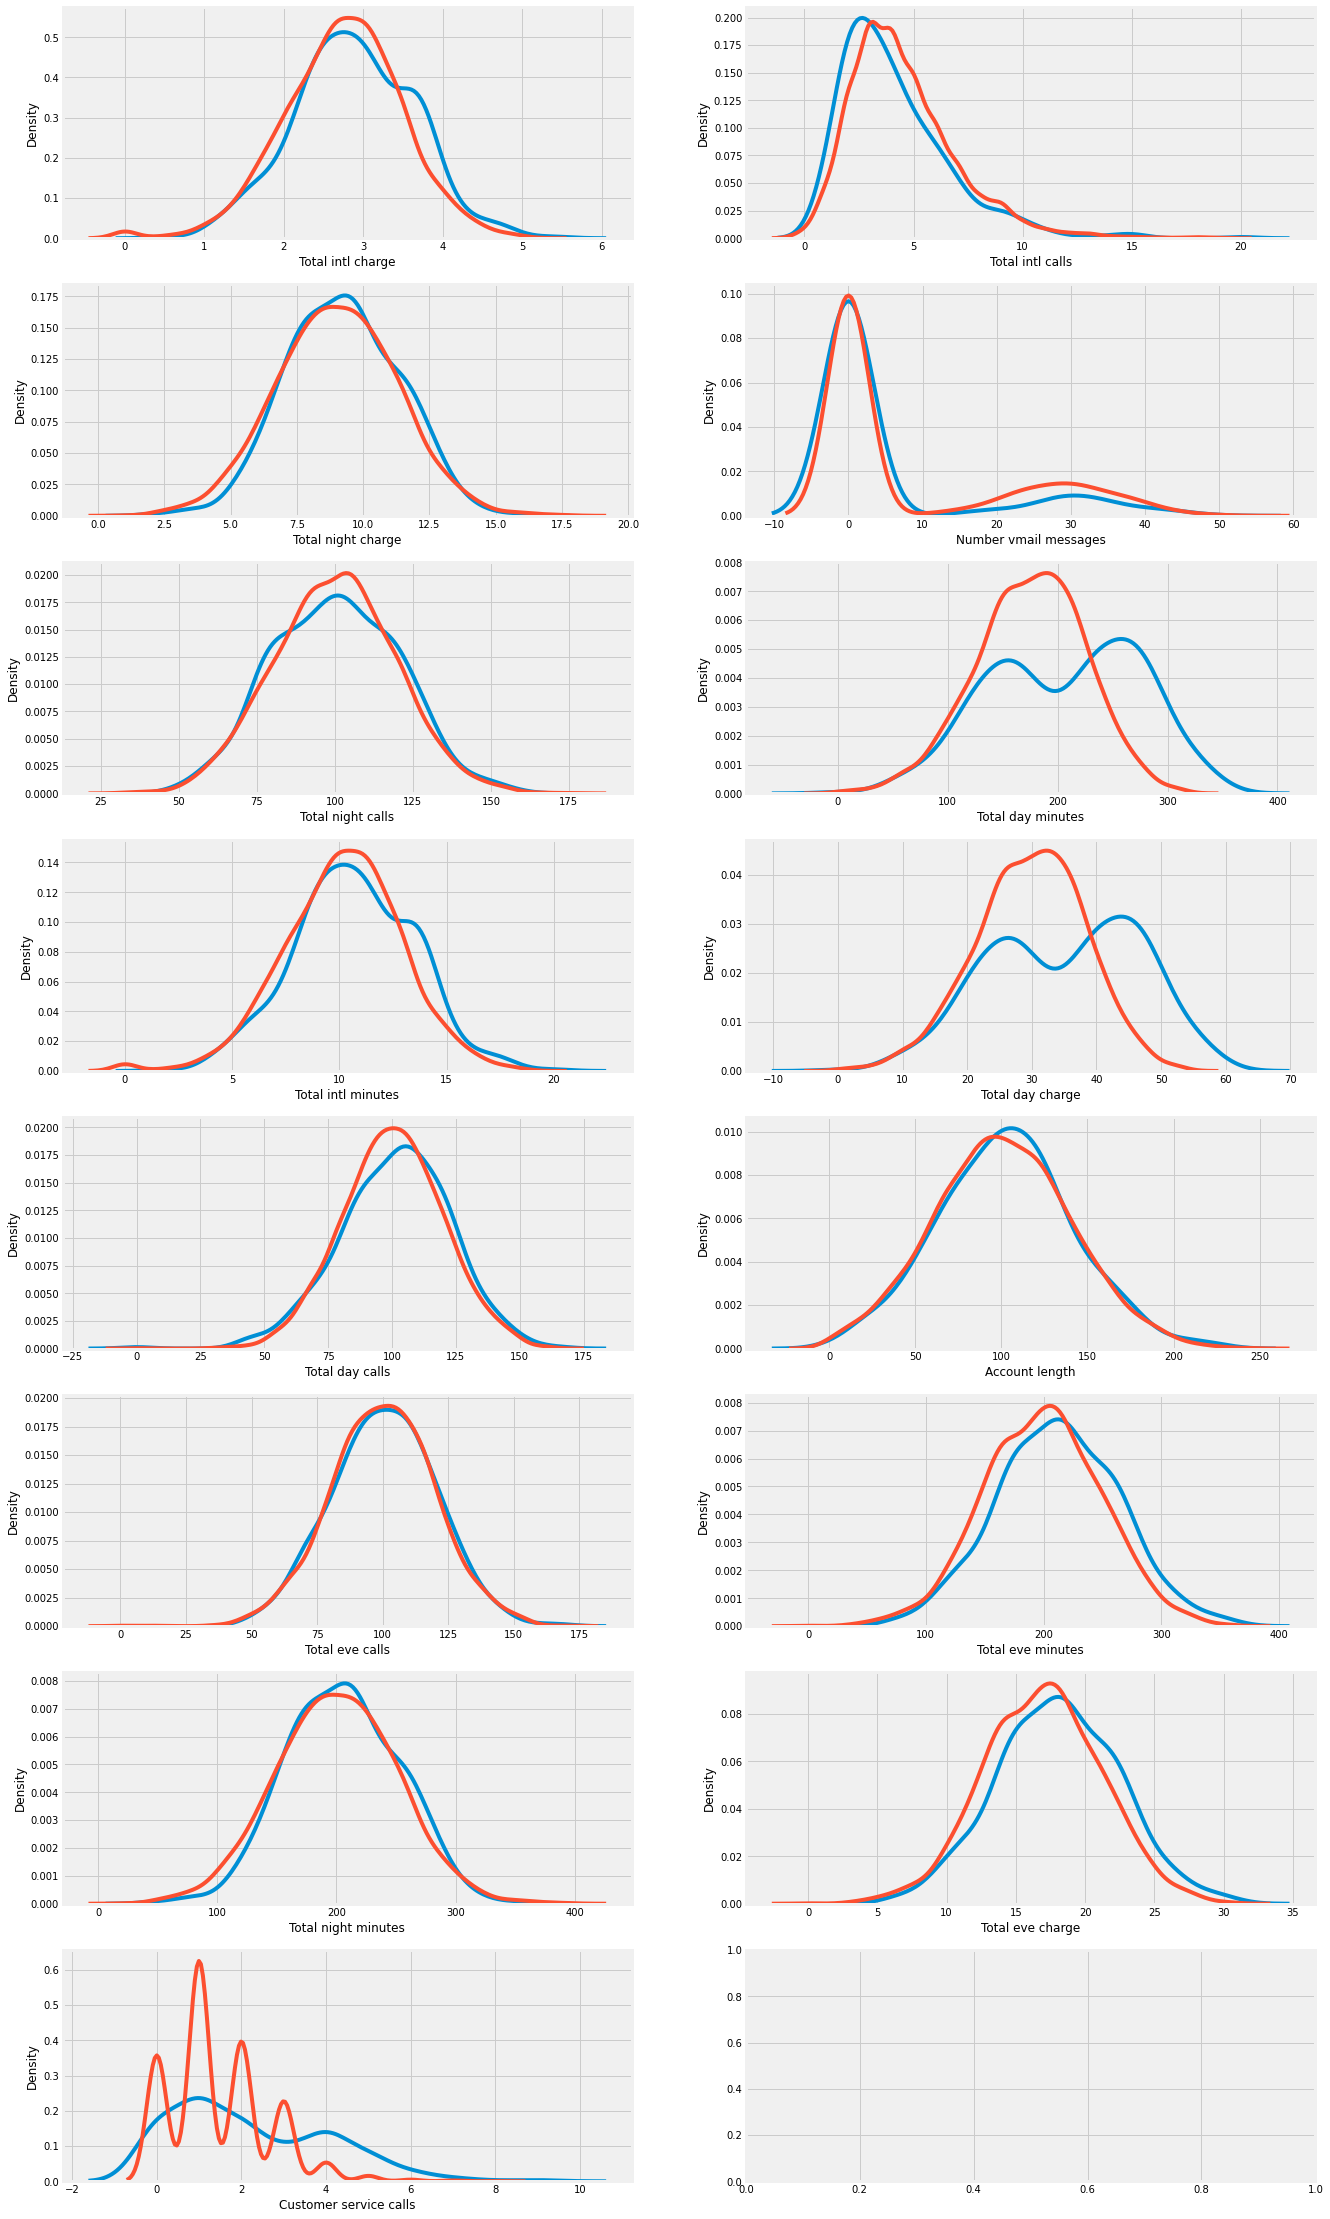

In [75]:
churn_check(continuous_col,2,8)

In [ ]:
# # Distribution plot
# ax = sns.distplot(data_churn['Total intl charge'],label='churn',hist=False)
# ax = sns.distplot(data_non_churn['Total intl charge'],label='not churn',hist=False)
# ax.set(xlabel='Total intl charge')

---
### 이상치 확인하기

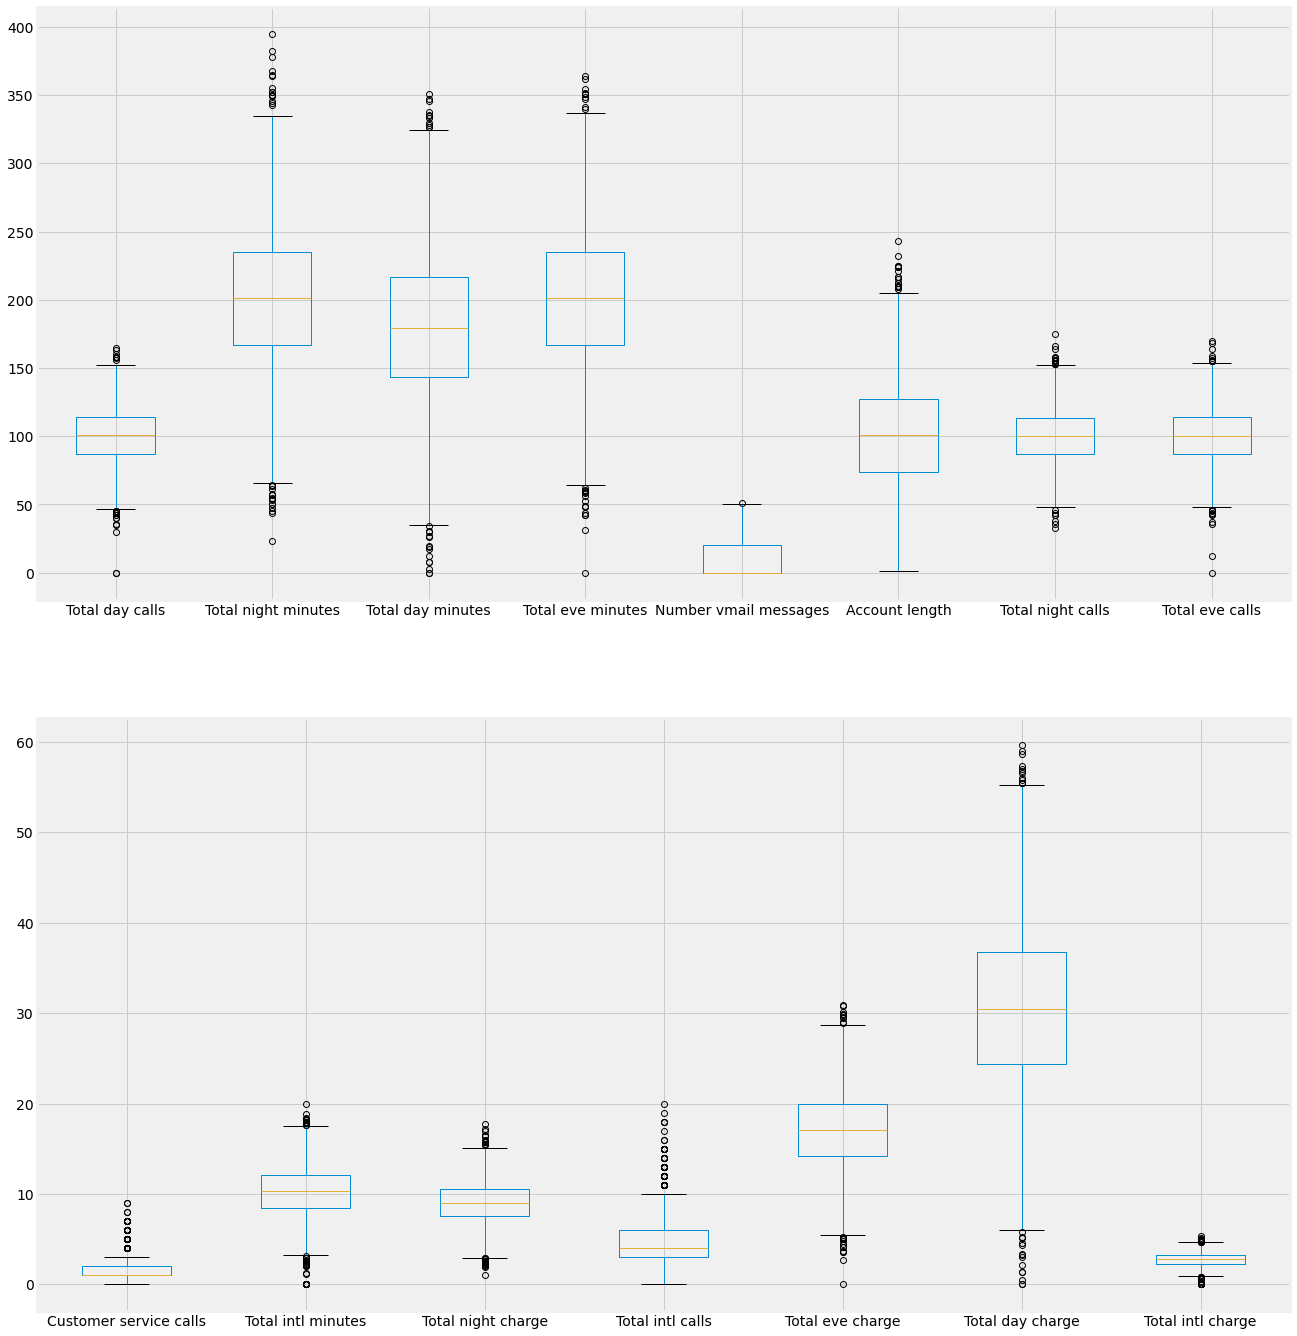

In [18]:
col_a = ['Total day calls','Total night minutes','Total day minutes','Total eve minutes',
         'Number vmail messages','Account length','Total night calls','Total eve calls']

col_b = [ 'Customer service calls','Total intl minutes','Total night charge',
         'Total intl calls', 'Total eve charge','Total day charge', 'Total intl charge']


plt.figure(figsize=(20,24))
plt.subplot(2,1,1)
telecom.boxplot(column=col_a, fontsize=14)

plt.subplot(2,1,2)
telecom.boxplot(column=col_b, fontsize=14)
plt.show()

------
### 2. modeling

- Churn
False -> 0  
True -> 1   

- imbalance 데이터이기 때문에 평가지표는 f1 score 사용

In [19]:
telecom["Churn"].map({False: 0, True: 1}).value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [20]:
m = {False: 0, True: 1}
telecom["Churn"] = telecom["Churn"].map(m)
telecom.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [34]:
# X = telecom.drop(['Churn','State','International plan','Voice mail plan','Area code'], axis=1)
# y = telecom[['Churn']]
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state=42)


`'International plan','Voice mail plan'`는 map을 통해 0 1 로 바꿈  
`'State'`는 target encoding  
`'Area code'` 는 one-hot encoding(dummy) 

In [140]:
display(telecom['Area code'].unique())
display(telecom['State'].unique())

array([415, 408, 510])

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [150]:
area_dummy_mat = pd.get_dummies(telecom['Area code'])
area_dummy_mat
telecom = telecom.join(area_dummy_mat.add_prefix('Area code_'))
telecom.drop(columns = ['Area code'])

,State,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,...,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Area code_408,Area code_415,Area code_510
0,KS,128,0,1,25,265.1,110,45.07,197.4,99,...,91,11.01,10.0,3,2.70,1,0,0,1,0
1,OH,107,0,1,26,161.6,123,27.47,195.5,103,...,103,11.45,13.7,3,3.70,1,0,0,1,0
2,NJ,137,0,0,0,243.4,114,41.38,121.2,110,...,104,7.32,12.2,5,3.29,0,0,0,1,0
3,OH,84,1,0,0,299.4,71,50.90,61.9,88,...,89,8.86,6.6,7,1.78,2,0,1,0,0
4,OK,75,1,0,0,166.7,113,28.34,148.3,122,...,121,8.41,10.1,3,2.73,3,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,0,1,36,156.2,77,26.55,215.5,126,...,83,12.56,9.9,6,2.67,2,0,0,1,0
3329,WV,68,0,0,0,231.1,57,39.29,153.4,55,...,123,8.61,9.6,4,2.59,3,0,0,1,0
3330,RI,28,0,0,0,180.8,109,30.74,288.8,58,...,91,8.64,14.1,6,3.81,2,0,0,0,1
3331,CT,184,1,0,0,213.8,105,36.35,159.6,84,...,137,6.26,5.0,10,1.35,2,0,0,0,1


In [136]:
X = telecom.drop(['Churn'], axis=1)
y = telecom[['Churn']]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state=42)

In [141]:
from category_encoders import TargetEncoder
enc = TargetEncoder(cols=['State'])
X_train = enc.fit_transform(X_train, y_train)
X_train

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
817,0.120690,243,510,0,0,0,95.5,92,16.24,163.7,63,13.91,264.2,118,11.89,6.6,6,1.78,2
1373,0.255319,108,415,0,0,0,112.0,105,19.04,193.7,110,16.46,208.9,93,9.40,4.1,4,1.11,4
679,0.271186,75,415,1,0,0,222.4,78,37.81,327.0,111,27.80,208.0,104,9.36,8.7,9,2.35,1
56,0.122807,141,415,0,0,0,126.9,98,21.57,180.0,62,15.30,140.8,128,6.34,8.0,2,2.16,1
1993,0.173077,86,510,0,0,0,216.3,96,36.77,266.3,77,22.64,214.0,110,9.63,4.5,3,1.22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,0.107143,106,510,0,0,0,274.4,120,46.65,198.6,82,16.88,160.8,62,7.24,6.0,3,1.62,1
1130,0.200000,122,415,0,0,0,35.1,62,5.97,180.8,89,15.37,251.6,58,11.32,12.7,2,3.43,1
1294,0.169492,66,408,0,0,0,87.6,76,14.89,262.0,111,22.27,184.6,125,8.31,9.2,5,2.48,1
860,0.063830,169,415,0,0,0,179.2,111,30.46,175.2,130,14.89,228.6,92,10.29,9.9,6,2.67,2


-----
### oversampling

In [40]:
%%time

# 1: 1
smote = SMOTE(random_state=42, sampling_strategy= 'auto')
X_train_sm,y_train_sm = smote.fit_resample(X_train,y_train)

print("Before smote:", len(y_train))
print("-----------------------")
print("After smote:", len(y_train_sm))
print(y_train_sm.value_counts())

Before smote: 4568
-----------------------
After smote: 4568
Churn
0        2284
1        2284
dtype: int64
CPU times: user 13.5 ms, sys: 4.84 ms, total: 18.3 ms
Wall time: 18.7 ms


---
### logistic regression

In [ ]:
# score_auc = []

# oof_lr = np.zeros(len(train))
# pred_lr = np.zeros(len(test))

# folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# for fold_ , (train_ind, val_ind) in enumerate(folds.split(train, target)):
#     print('fold:', fold_, '  - Starting ...')
#     trn_data, val_data = train.iloc[train_ind], train.iloc[val_ind]
#     y_train, y_val = target.iloc[train_ind], target.iloc[val_ind]
    
#     lr = LogisticRegression(C=0.1, solver='newton-cg',max_iter=100, random_state=2020, class_weight={0: 1, 1:3})
#     lr.fit(trn_data, y_train)
#     oof_lr[val_ind] = lr.predict_proba(val_data)[:, 1]
#     y = lr.predict_proba(trn_data)[:, 1]
#     print('train auc:' , roc_auc_score(y_train, y),'val auc:' , roc_auc_score(y_val, oof_lr[val_ind]))
    
#     score_auc.append(roc_auc_score(y_val, oof_lr[val_ind]))
#     pred_lr += lr.predict_proba(test)[:, 1]/folds.n_splits
    
# print('-'*50)
# print(' Model auc:  ', np.mean(score_auc))

In [87]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

from sklearn import metrics
logistic_pred = logistic_model.predict(X_val)
# Print the prediction accuracy
print(metrics.accuracy_score(y_val, logistic_pred))

0.8440779610194903


AxesSubplot(0.08,0.125;0.87x0.755)
AxesSubplot(0.08,0.125;0.87x0.755)


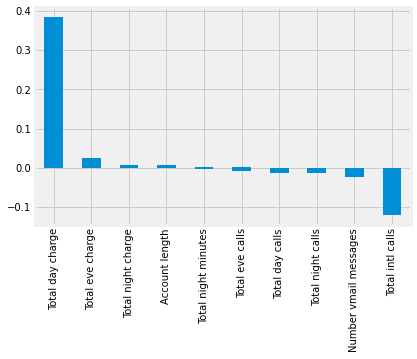

In [49]:
# To get the weights of all the variables
weights = pd.Series(model.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

In [45]:
%%time

# 1: 1
smote = SMOTE(random_state=42, sampling_strategy= 'auto')
X_train_sm,y_train_sm = smote.fit_resample(X_train,y_train)

print("Before smote:", len(y_train))
print("-----------------------")
print("After smote:", len(y_train_sm))
print(y_train_sm.value_counts())

Before smote: 2666
-----------------------
After smote: 4568
Churn
0        2284
1        2284
dtype: int64
CPU times: user 15.5 ms, sys: 5.18 ms, total: 20.6 ms
Wall time: 18 ms


In [46]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train_sm, y_train_sm)
prediction_test = model.predict(X_val)
# Print the prediction accuracy
print(metrics.accuracy_score(y_val, prediction_test))

0.6746626686656672


### random forest

In [51]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_val)
print(metrics.accuracy_score(y_val, prediction_test))

0.9055472263868066


In [172]:
pred_df = pd.DataFrame({"x_index" : X_val.index, "churn" : prediction_test, "answer_churn": y_val.values.ravel()})
pred_df.tail(10)

,x_index,churn,answer_churn
657,3249,0,0
658,678,0,0
659,3084,0,0
660,1572,0,0
661,2112,1,1
662,2577,0,0
663,2763,0,0
664,3069,0,0
665,1468,0,0
666,582,0,0


In [173]:
pred_df[pred_df['churn']!=pred_df['answer_churn']] #예측못한것 확인

,x_index,churn,answer_churn
17,787,0,1
47,1904,0,1
55,2925,0,1
68,3148,0,1
70,2147,0,1
...,...,...,...
627,2033,0,1
629,2868,0,1
632,2402,0,1
633,1322,0,1


<AxesSubplot:>

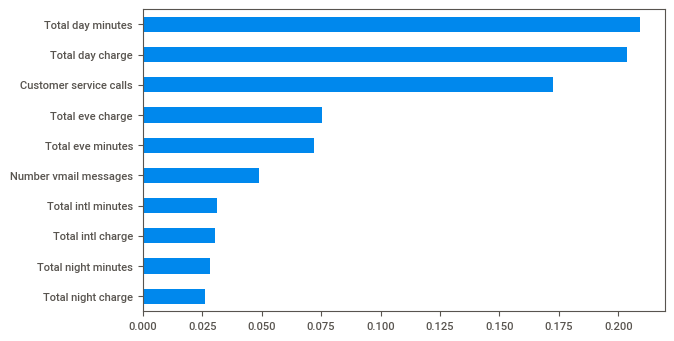

In [84]:
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

In [58]:
%%time
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
dt_clf_pred = dt_clf.predict(X_val)
print(metrics.accuracy_score(y_val, dt_clf_pred))
print('---------------------')
feature_importance_values = dt_clf.feature_importances_
feature_importances = pd.Series(feature_importance_values, index=X_train.columns)
feature_top= feature_importances.sort_values(ascending=False)[:15]
print(feature_top)

0.8725637181409296
---------------------
Total day charge          0.242591
Customer service calls    0.129675
Total eve charge          0.098232
Number vmail messages     0.075505
Total eve minutes         0.070645
Total day calls           0.060094
Total night calls         0.048969
Account length            0.043932
Total day minutes         0.043884
Total night minutes       0.041443
Total intl calls          0.035925
Total eve calls           0.033007
Total night charge        0.030142
Total intl minutes        0.025293
Total intl charge         0.020663
dtype: float64
CPU times: user 43.1 ms, sys: 1.91 ms, total: 45 ms
Wall time: 43.4 ms


---

In [105]:
def evaluate(y_test, pred):
    res=[]
    res_table=[]

    # confusion matrix
    cm = confusion_matrix(y_test, pred); print(cm)
    TN = cm[0][0]
    FN = cm[1][0]
    TP = cm[1][1]
    FP = cm[0][1]
    res.extend([TP, FN, TN, FP]) 
    
    accuracy = accuracy_score(y_test, pred) ;print(f'Mean accuracy score: {accuracy:.3}'); res.append(accuracy)
    recall =recall_score(y_test, pred) ; print(f'recall: {recall: .3}') ; res.append(recall)
    precision= precision_score(y_test, pred) ; print(f'precision: {precision: .3}') ; res.append(precision)
    auc= roc_auc_score(y_test, pred) ; print(f'auc: {auc: .3}') ; res.append(auc)
    f1= f1_score(y_test, pred) ; print(f'f1: {f1: .3}') ; res.append(f1)
    
    res_table.append(res)
    df=pd.DataFrame(res_table, columns = ['TP', 'FN', 'TN', 'FP','accuracy','Recall','Precision', 'AUC', 'F1-Score'])
    df.index.name="Model"
    
    return df

-----

## lgbm

In [93]:
start_time=time.time()

lgbm = LGBMClassifier(scale_pos_weight = 9.5,
                       learning_rate=0.1, 
                       num_iterations = 1000, # n_estimator 랑 같은 것 같음
                       max_depth = 4,
                       n_jobs = -1,
                       boost_from_average=False,
                       objective = 'binary')

In [108]:
trained_model = lgbm.fit( X_train, y_train, 
          eval_set=[(X_val, y_val)],
          early_stopping_rounds=25, 
          verbose = 5,
          eval_metric ="logloss")                         

train_pred = trained_model.predict(X_train)
train_prob = trained_model.predict_proba(X_train)[:, 1]

test_pred = trained_model.predict(X_val)
test_prob = trained_model.predict_proba(X_val)[:, 1]

accuracy = accuracy_score(y_val, test_pred)
f1 = f1_score(y_val, test_pred)

print('정확도: {0:.4f}, F1: {1:.4f}'.format(accuracy,f1))

[5]	valid_0's binary_logloss: 0.582327
[10]	valid_0's binary_logloss: 0.530561
[15]	valid_0's binary_logloss: 0.503984
[20]	valid_0's binary_logloss: 0.486555
[25]	valid_0's binary_logloss: 0.480955
[30]	valid_0's binary_logloss: 0.473971
[35]	valid_0's binary_logloss: 0.467652
[40]	valid_0's binary_logloss: 0.45884
[45]	valid_0's binary_logloss: 0.454097
[50]	valid_0's binary_logloss: 0.449024
[55]	valid_0's binary_logloss: 0.440413
[60]	valid_0's binary_logloss: 0.435439
[65]	valid_0's binary_logloss: 0.428632
[70]	valid_0's binary_logloss: 0.422609
[75]	valid_0's binary_logloss: 0.416907
[80]	valid_0's binary_logloss: 0.412435
[85]	valid_0's binary_logloss: 0.406305
[90]	valid_0's binary_logloss: 0.403011
[95]	valid_0's binary_logloss: 0.394871
[100]	valid_0's binary_logloss: 0.389186
[105]	valid_0's binary_logloss: 0.384102
[110]	valid_0's binary_logloss: 0.381698
[115]	valid_0's binary_logloss: 0.377186
[120]	valid_0's binary_logloss: 0.374035
[125]	valid_0's binary_logloss: 0.370

In [110]:
eval_lgbm = evaluate(y_val, test_pred)
eval_lgbm

[[527  39]
 [ 34  67]]
Mean accuracy score: 0.891
recall:  0.663
precision:  0.632
auc:  0.797
f1:  0.647


,TP,FN,TN,FP,accuracy,Recall,Precision,AUC,F1-Score
Model,,,,,,,,,
0,67,34,527,39,0.890555,0.663366,0.632075,0.797231,0.647343


### lgbm 랜덤서치

In [120]:
lgbm = LGBMClassifier(tree_method = 'gpu_hist', gpu_id=0)

params = {'n_estimators': [1000, 2000, 3000, 4000],
          'learning_rate': [0.1, 0.05, 0.01],
          'max_depth': [5,7,9],
          'subsample': [0,7, 0.8, 0.9, 1]
         }

evals = [(X_val, y_val)]
lgbm_grid = RandomizedSearchCV(lgbm, param_distributions= params,
                               n_iter=3, scoring="f1", cv=3, refit=True, random_state=42)


lgbm_grid.fit(X_train, y_train.values.ravel(), early_stopping_rounds=100,
              eval_metric="f1", eval_set = evals)

[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] Unknown parameter: gpu_id
[1]	valid_0's binary_logloss: 0.38657
[2]	valid_0's binary_logloss: 0.36175
[3]	valid_0's binary_logloss: 0.345385
[4]	valid_0's binary_logloss: 0.332526
[5]	valid_0's binary_logloss: 0.323473
[6]	valid_0's binary_logloss: 0.311713
[7]	valid_0's binary_logloss: 0.304287
[8]	valid_0's binary_logloss: 0.299147
[9]	valid_0's binary_logloss: 0.292052
[10]	valid_0's binary_logloss: 0.285409
[11]	valid_0's binary_logloss: 0.280134
[12]	valid_0's binary_logloss: 0.277311
[13]	valid_0's binary_logloss: 0.275618
[14]	valid_0's binary_logloss: 0.271467
[15]	valid_0's binary_logloss: 0.270341
[16]	valid_0's binary_logloss: 0.267577
[17]	valid_0's binary_logloss: 0.265193
[18]	valid_0's binary_logloss: 0.26383
[19]	valid_0's binary_logloss: 0.261977
[20]	valid_0's binary_logloss: 0.26246
[21]	valid_0's binary_logloss: 0.260618
[22]	valid_0's binary_logloss: 0.257566
[23]	valid_0's binary_logloss: 0.2

[114]	valid_0's binary_logloss: 0.254923
[115]	valid_0's binary_logloss: 0.25445
[116]	valid_0's binary_logloss: 0.254935
[117]	valid_0's binary_logloss: 0.255355
[118]	valid_0's binary_logloss: 0.255534
[119]	valid_0's binary_logloss: 0.255975
[120]	valid_0's binary_logloss: 0.256313
[121]	valid_0's binary_logloss: 0.256761
[122]	valid_0's binary_logloss: 0.257322
[123]	valid_0's binary_logloss: 0.257989
[124]	valid_0's binary_logloss: 0.258003
[125]	valid_0's binary_logloss: 0.258464
[126]	valid_0's binary_logloss: 0.259175
[127]	valid_0's binary_logloss: 0.259909
[128]	valid_0's binary_logloss: 0.260104
[129]	valid_0's binary_logloss: 0.260326
[130]	valid_0's binary_logloss: 0.259884
[131]	valid_0's binary_logloss: 0.260347
[132]	valid_0's binary_logloss: 0.260417
[133]	valid_0's binary_logloss: 0.260507
[134]	valid_0's binary_logloss: 0.261105
[135]	valid_0's binary_logloss: 0.261392
[136]	valid_0's binary_logloss: 0.261316
[137]	valid_0's binary_logloss: 0.261567
[138]	valid_0's b

[83]	valid_0's binary_logloss: 0.259006
[84]	valid_0's binary_logloss: 0.259735
[85]	valid_0's binary_logloss: 0.260582
[86]	valid_0's binary_logloss: 0.260549
[87]	valid_0's binary_logloss: 0.261233
[88]	valid_0's binary_logloss: 0.262275
[89]	valid_0's binary_logloss: 0.263394
[90]	valid_0's binary_logloss: 0.264097
[91]	valid_0's binary_logloss: 0.264803
[92]	valid_0's binary_logloss: 0.265789
[93]	valid_0's binary_logloss: 0.26686
[94]	valid_0's binary_logloss: 0.267447
[95]	valid_0's binary_logloss: 0.268337
[96]	valid_0's binary_logloss: 0.269018
[97]	valid_0's binary_logloss: 0.270018
[98]	valid_0's binary_logloss: 0.270195
[99]	valid_0's binary_logloss: 0.269877
[100]	valid_0's binary_logloss: 0.271342
[101]	valid_0's binary_logloss: 0.273076
[102]	valid_0's binary_logloss: 0.2739
[103]	valid_0's binary_logloss: 0.275111
[104]	valid_0's binary_logloss: 0.275918
[105]	valid_0's binary_logloss: 0.276773
[106]	valid_0's binary_logloss: 0.277361
[107]	valid_0's binary_logloss: 0.27

[302]	valid_0's binary_logloss: 0.252579
[303]	valid_0's binary_logloss: 0.252591
[304]	valid_0's binary_logloss: 0.252488
[305]	valid_0's binary_logloss: 0.252478
[306]	valid_0's binary_logloss: 0.252493
[307]	valid_0's binary_logloss: 0.252505
[308]	valid_0's binary_logloss: 0.252453
[309]	valid_0's binary_logloss: 0.252454
[310]	valid_0's binary_logloss: 0.252453
[311]	valid_0's binary_logloss: 0.252369
[312]	valid_0's binary_logloss: 0.252377
[313]	valid_0's binary_logloss: 0.252229
[314]	valid_0's binary_logloss: 0.252266
[315]	valid_0's binary_logloss: 0.252328
[316]	valid_0's binary_logloss: 0.252347
[317]	valid_0's binary_logloss: 0.252391
[318]	valid_0's binary_logloss: 0.252398
[319]	valid_0's binary_logloss: 0.252432
[320]	valid_0's binary_logloss: 0.252452
[321]	valid_0's binary_logloss: 0.252477
[322]	valid_0's binary_logloss: 0.252553
[323]	valid_0's binary_logloss: 0.252583
[324]	valid_0's binary_logloss: 0.252621
[325]	valid_0's binary_logloss: 0.252667
[326]	valid_0's 

[94]	valid_0's binary_logloss: 0.286574
[95]	valid_0's binary_logloss: 0.286168
[96]	valid_0's binary_logloss: 0.285497
[97]	valid_0's binary_logloss: 0.284842
[98]	valid_0's binary_logloss: 0.284477
[99]	valid_0's binary_logloss: 0.284045
[100]	valid_0's binary_logloss: 0.283623
[101]	valid_0's binary_logloss: 0.283219
[102]	valid_0's binary_logloss: 0.282671
[103]	valid_0's binary_logloss: 0.282247
[104]	valid_0's binary_logloss: 0.281699
[105]	valid_0's binary_logloss: 0.281167
[106]	valid_0's binary_logloss: 0.280617
[107]	valid_0's binary_logloss: 0.280253
[108]	valid_0's binary_logloss: 0.279678
[109]	valid_0's binary_logloss: 0.279305
[110]	valid_0's binary_logloss: 0.278826
[111]	valid_0's binary_logloss: 0.278549
[112]	valid_0's binary_logloss: 0.27798
[113]	valid_0's binary_logloss: 0.27752
[114]	valid_0's binary_logloss: 0.277226
[115]	valid_0's binary_logloss: 0.276696
[116]	valid_0's binary_logloss: 0.276335
[117]	valid_0's binary_logloss: 0.275963
[118]	valid_0's binary_l

[1]	valid_0's binary_logloss: 0.420961
[2]	valid_0's binary_logloss: 0.416838
[3]	valid_0's binary_logloss: 0.412719
[4]	valid_0's binary_logloss: 0.408992
[5]	valid_0's binary_logloss: 0.405259
[6]	valid_0's binary_logloss: 0.401812
[7]	valid_0's binary_logloss: 0.39853
[8]	valid_0's binary_logloss: 0.395257
[9]	valid_0's binary_logloss: 0.392151
[10]	valid_0's binary_logloss: 0.389245
[11]	valid_0's binary_logloss: 0.386325
[12]	valid_0's binary_logloss: 0.383231
[13]	valid_0's binary_logloss: 0.38044
[14]	valid_0's binary_logloss: 0.377764
[15]	valid_0's binary_logloss: 0.37514
[16]	valid_0's binary_logloss: 0.372657
[17]	valid_0's binary_logloss: 0.370354
[18]	valid_0's binary_logloss: 0.367983
[19]	valid_0's binary_logloss: 0.36572
[20]	valid_0's binary_logloss: 0.363473
[21]	valid_0's binary_logloss: 0.361409
[22]	valid_0's binary_logloss: 0.35932
[23]	valid_0's binary_logloss: 0.357316
[24]	valid_0's binary_logloss: 0.35537
[25]	valid_0's binary_logloss: 0.353575
[26]	valid_0's 

[396]	valid_0's binary_logloss: 0.237364
[397]	valid_0's binary_logloss: 0.237393
[398]	valid_0's binary_logloss: 0.237566
[399]	valid_0's binary_logloss: 0.237574
[400]	valid_0's binary_logloss: 0.237561
[401]	valid_0's binary_logloss: 0.2376
[402]	valid_0's binary_logloss: 0.237681
[403]	valid_0's binary_logloss: 0.237822
[404]	valid_0's binary_logloss: 0.237811
[405]	valid_0's binary_logloss: 0.237822
[406]	valid_0's binary_logloss: 0.237776
[407]	valid_0's binary_logloss: 0.237925
[408]	valid_0's binary_logloss: 0.237919
[409]	valid_0's binary_logloss: 0.237858
[410]	valid_0's binary_logloss: 0.238035
[411]	valid_0's binary_logloss: 0.238074
[412]	valid_0's binary_logloss: 0.23821
[413]	valid_0's binary_logloss: 0.238327
[414]	valid_0's binary_logloss: 0.238265
[415]	valid_0's binary_logloss: 0.238246
[416]	valid_0's binary_logloss: 0.238393
[417]	valid_0's binary_logloss: 0.238515
[418]	valid_0's binary_logloss: 0.238519
[419]	valid_0's binary_logloss: 0.238459
[420]	valid_0's bin

[130]	valid_0's binary_logloss: 0.244242
[131]	valid_0's binary_logloss: 0.24455
[132]	valid_0's binary_logloss: 0.244201
[133]	valid_0's binary_logloss: 0.24522
[134]	valid_0's binary_logloss: 0.245201
[135]	valid_0's binary_logloss: 0.245695
[136]	valid_0's binary_logloss: 0.245683
[137]	valid_0's binary_logloss: 0.245438
[138]	valid_0's binary_logloss: 0.245281
[139]	valid_0's binary_logloss: 0.24531
[140]	valid_0's binary_logloss: 0.24536
[141]	valid_0's binary_logloss: 0.245232
[142]	valid_0's binary_logloss: 0.245588
[143]	valid_0's binary_logloss: 0.246531
[144]	valid_0's binary_logloss: 0.246879
[145]	valid_0's binary_logloss: 0.247151
[146]	valid_0's binary_logloss: 0.247056
[147]	valid_0's binary_logloss: 0.246876
[148]	valid_0's binary_logloss: 0.247429
[149]	valid_0's binary_logloss: 0.24694
[150]	valid_0's binary_logloss: 0.247247
[151]	valid_0's binary_logloss: 0.24759
[152]	valid_0's binary_logloss: 0.248159
[153]	valid_0's binary_logloss: 0.248023
[154]	valid_0's binary

RandomizedSearchCV(cv=3,
                   estimator=LGBMClassifier(gpu_id=0, tree_method='gpu_hist'),
                   n_iter=3,
                   param_distributions={'learning_rate': [0.1, 0.05, 0.01],
                                        'max_depth': [5, 7, 9],
                                        'n_estimators': [1000, 2000, 3000,
                                                         4000],
                                        'subsample': [0, 7, 0.8, 0.9, 1]},
                   random_state=42, scoring='f1')

In [121]:
lgbm_grid.best_params_

{'subsample': 1, 'n_estimators': 4000, 'max_depth': 5, 'learning_rate': 0.1}

In [122]:
pred_lgbm_clf = lgbm_grid.predict(X_val)
eval_lgbm_clf = evaluate(pred_lgbm_clf, y_val)
eval_lgbm_clf

[[557  43]
 [  9  58]]
Mean accuracy score: 0.922
recall:  0.866
precision:  0.574
auc:  0.897
f1:  0.69


,TP,FN,TN,FP,accuracy,Recall,Precision,AUC,F1-Score
Model,,,,,,,,,
0,58,9,557,43,0.922039,0.865672,0.574257,0.897002,0.690476


In [126]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(lgbm_grid, scoring = "f1", random_state = 42).fit(X_val, y_val)
eli5.show_weights(perm, top = 20, feature_names = X_val.columns.tolist())

ModuleNotFoundError: No module named 'eli5'

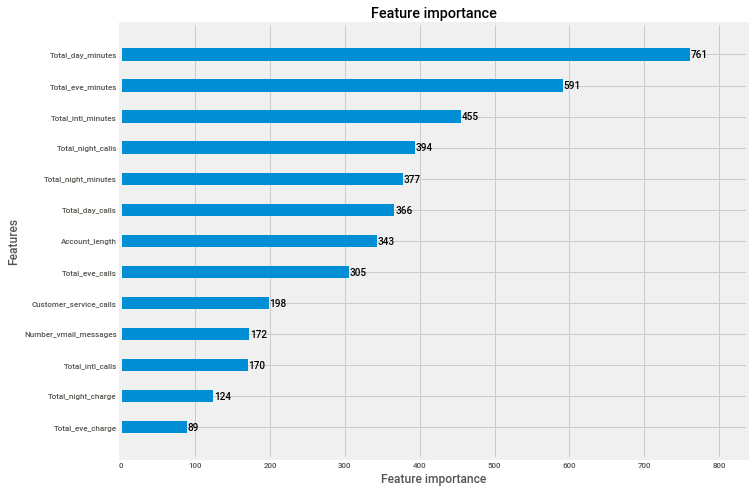

In [128]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(trained_model, ax=ax , max_num_features=20, height=0.4);

---

### focal loss 를 사용해서 학습시킨 lgbm 
- Cross Entropy의 클래스 불균형 문제를 개선한 개념   

In [103]:
from scipy import optimize
from scipy import special

class FocalLoss:
    def __init__(self, gamma, alpha=None):
        self.alpha = alpha
        self.gamma = gamma

    def at(self, y):
        if self.alpha is None:
            return np.ones_like(y)
        return np.where(y, self.alpha, 1 - self.alpha)

    def pt(self, y, p):
        p = np.clip(p, 1e-15, 1 - 1e-15)
        return np.where(y, p, 1 - p)

    def __call__(self, y_true, y_pred):
        at = self.at(y_true)
        pt = self.pt(y_true, y_pred)
        return -at * (1 - pt) ** self.gamma * np.log(pt)

    def grad(self, y_true, y_pred):
        y = 2 * y_true - 1  # {0, 1} -> {-1, 1}
        at = self.at(y_true)
        pt = self.pt(y_true, y_pred)
        g = self.gamma
        return at * y * (1 - pt) ** g * (g * pt * np.log(pt) + pt - 1)

    def hess(self, y_true, y_pred):
        y = 2 * y_true - 1  # {0, 1} -> {-1, 1}
        at = self.at(y_true)
        pt = self.pt(y_true, y_pred)
        g = self.gamma

        u = at * y * (1 - pt) ** g
        du = -at * y * g * (1 - pt) ** (g - 1)
        v = g * pt * np.log(pt) + pt - 1
        dv = g * np.log(pt) + g + 1

        return (du * v + u * dv) * y * (pt * (1 - pt))

    def init_score(self, y_true):
        res = optimize.minimize_scalar(
            lambda p: self(y_true, p).sum(),
            bounds=(0, 1),
            method='bounded'
        )
        p = res.x
        log_odds = np.log(p / (1 - p))
        return log_odds

    def lgb_obj(self, preds, train_data):
        y = train_data.get_label()
        p = special.expit(preds)
        return self.grad(y, p), self.hess(y, p)

    def lgb_eval(self, preds, train_data):
        y = train_data.get_label()
        p = special.expit(preds)
        is_higher_better = False
        return 'focal_loss', self(y, p).mean(), is_higher_better

In [111]:
import lightgbm
from scipy import optimize
from scipy import special
from sklearn import metrics
from sklearn import model_selection
import time

start_time=time.time()
fl = FocalLoss(alpha=None, gamma=2)

fit = lightgbm.Dataset(
    X_train, y_train,
    init_score=np.full_like(y_train, fl.init_score(y_train), dtype=float)
)

val = lightgbm.Dataset(
    X_val, y_val,
    init_score=np.full_like(y_val, fl.init_score(y_train), dtype=float),
    reference=fit # trainset 의미
)

model = lightgbm.train(
    params={
            'objective' : 'binary',
            # 'scale_pos_weight': 11,
            'learning_rate': 0.1, 
            'num_iterations' : 1000,
            'max_depth' : 4,
            'n_jobs':-1,
            'boost_from_average':False,
            'metric' : 'logloss'},

    train_set=fit,
    valid_sets=(fit, val),
    valid_names=('fit', 'val'),
    early_stopping_rounds=25,
    verbose_eval = 5,
    fobj=fl.lgb_obj,
    feval=fl.lgb_eval
)


train_prob = special.expit(fl.init_score(y_train) + model.predict(X_train))
train_pred = (train_prob >= 0.5).astype('int')

test_prob = special.expit(fl.init_score(y_train) + model.predict(X_val))
test_pred = (test_prob >= 0.5).astype('int')


# focal loss LGBM
accuracy = accuracy_score(y_val, test_pred)
f1 = f1_score(y_val, test_pred)

print('정확도: {0:.4f}, F1: {1:.4f}'.format(accuracy,f1))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Using self-defined objective function
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000613 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2380
[LightGBM] [Info] Number of data points in the train set: 2666, number of used features: 15
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Using self-defined objective function
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 25 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

In [112]:
eval_lgbm_focalloss = evaluate(y_val, test_pred)
eval_lgbm_focalloss

[[559   7]
 [ 46  55]]
Mean accuracy score: 0.921
recall:  0.545
precision:  0.887
auc:  0.766
f1:  0.675


,TP,FN,TN,FP,accuracy,Recall,Precision,AUC,F1-Score
Model,,,,,,,,,
0,55,46,559,7,0.92054,0.544554,0.887097,0.766093,0.674847


In [ ]:
# sampler = TPESampler(seed=seed)

# def objective_lgbm(trial):
#     dtrain = lightgbm.Dataset(X_train, label = y_train)
#     dtest = lightgbm.Dataset(X_val, label = y_val)

#     params = {
#         'objective': 'binary', # 이중분류
#        #  'boosting_type': 'gbdt',
#         'verbose': -1,
#         'device_type': 'gpu',
#         'metric': 'logloss',       # metric은 logloss
#         'scale_pos_weight':trial.suggest_int('scale_pos_weight',1, 5),      # scale_pos_weight
#         'max_depth': trial.suggest_int('max_depth',5, 30),
#         'learning_rate': trial.suggest_loguniform("learning_rate", 1e-4, 1e-1),
#         'n_estimators': trial.suggest_int('n_estimators', 500, 2000),
#         'min_child_samples': trial.suggest_int('min_child_samples', 50, 200),
#          'subsample': trial.suggest_loguniform('subsample', 0.3, 0.8),
#         # "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 50, 1000, step=50),
#         # "lambda_l1": trial.suggest_int("lambda_l1", 0, 100, step=5),
#         # "lambda_l2": trial.suggest_int("lambda_l2", 0, 100, step=5),
#     }

#     model = lightgbm.LGBMClassifier(**params)
#     lgb_model = model.fit(X_train, y_train, 
#                           eval_set=[(X_val, y_val)],
#                           eval_metric ="logloss" ,
#                           # eval_class_weight = {'0': 0.95,
#                           #                      '1': 0.05},
#                           # verbose=10, 
#                           callbacks = [lightgbm.early_stopping(stopping_rounds = 20, first_metric_only=False)])
    
#     # early_stopping_rounds = 25
#     f1 = f1_score(y_val, lgb_model.predict(X_val))
#     return f1
        
# study_lgb = optuna.create_study(direction = 'maximize', sampler = sampler)
# study_lgb.optimize(objective_lgbm, n_trials = 50)


# trial = study_lgb.best_trial
# trial_params = trial.params
# # trial_params['scale_pos_weight'] =  9.5
# print('Best Trial: score {},\nparams {}'.format(trial.value, trial_params))

# final_lgb_model = lightgbm.LGBMClassifier(**trial_params)
# final_lgb_model.fit(X_train, y_train)
# final_lgb_pred = final_lgb_model.predict(X_val)
# final_lgb_test = final_lgb_model.predict(public_df)

# F1_pred = f1_score(y_val, final_lgb_pred)
# F1_test = f1_score(pb_target, final_lgb_test)

# print('F1 validation: ', F1_pred)
# print('F1 public: ', F1_test)

# feature_imp = pd.DataFrame(sorted(zip(final_lgb_model.feature_importances_,X_train.columns)), columns=['Value','Feature'])

# plt.figure(figsize=(25, 15))
# sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
# plt.show()

---
## xgboost

In [131]:
#랜덤서치 파라미터 입력

xgb_g1 = XGBClassifier(n_estimators=4000, random_state=42,
                        subsample=0.5, max_depth=15, learning_rate=0.1,)
                       #tree_method = 'gpu_hist', gpu_id=0)

xgb_model = xgb_g1.fit(X_train, y_train.values.ravel(), early_stopping_rounds=30,
            eval_metric="auc", eval_set=[(X_train, y_train), (X_val, y_val)])
     
pred_xgb_g1 = xgb_model.predict(X_val)

[0]	validation_0-auc:0.87841	validation_1-auc:0.83439
[1]	validation_0-auc:0.90691	validation_1-auc:0.85923
[2]	validation_0-auc:0.90991	validation_1-auc:0.87266
[3]	validation_0-auc:0.91089	validation_1-auc:0.87560
[4]	validation_0-auc:0.91791	validation_1-auc:0.87959
[5]	validation_0-auc:0.91845	validation_1-auc:0.88018
[6]	validation_0-auc:0.92772	validation_1-auc:0.87825
[7]	validation_0-auc:0.93143	validation_1-auc:0.87576
[8]	validation_0-auc:0.94468	validation_1-auc:0.87188
[9]	validation_0-auc:0.94460	validation_1-auc:0.87263
[10]	validation_0-auc:0.94753	validation_1-auc:0.87165
[11]	validation_0-auc:0.94841	validation_1-auc:0.87654
[12]	validation_0-auc:0.94998	validation_1-auc:0.87710
[13]	validation_0-auc:0.95670	validation_1-auc:0.88216
[14]	validation_0-auc:0.95602	validation_1-auc:0.88069
[15]	validation_0-auc:0.96075	validation_1-auc:0.88557
[16]	validation_0-auc:0.96266	validation_1-auc:0.89050
[17]	validation_0-auc:0.96513	validation_1-auc:0.88942
[18]	validation_0-au

In [119]:
eval_xgb_g1 = evaluate(pred_xgb_g1, y_val)
eval_xgb_g1

[[559  45]
 [  7  56]]
Mean accuracy score: 0.922
recall:  0.889
precision:  0.554
auc:  0.907
f1:  0.683


,TP,FN,TN,FP,accuracy,Recall,Precision,AUC,F1-Score
Model,,,,,,,,,
0,56,7,559,45,0.922039,0.888889,0.554455,0.907193,0.682927


-----
### catboost

In [ ]:
## catboost를 위한 데이터 타입 변환 
cat_feat = ['State','International plan','Voice mail plan','Area code','Customer service calls']

#train_df = telecom.copy() #아. 원본 데이터에서 가져오면 안되지;

for cat in cat_feat:
    train_df[cat] = train_df[cat].astype('int64')

In [ ]:
sampler = TPESampler(seed=seed)

def objective(trial):
    param = {
      'iterations':trial.suggest_int("iterations", 500, 3000),
      "random_state": seed,
        'objective':trial.suggest_categorical('objective',['Logloss']),
        'od_wait':trial.suggest_int('od_wait', 500, 1000),
        'learning_rate' : trial.suggest_uniform('learning_rate',0.01,1),
        'reg_lambda': trial.suggest_uniform('reg_lambda',1e-5,100),
        'random_strength': trial.suggest_uniform('random_strength',20,50),
        'scale_pos_weight':trial.suggest_int('scale_pos_weight',1, 9),
        'depth': trial.suggest_int('depth',1,15),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf',1,20),
        'leaf_estimation_iterations': trial.suggest_int('leaf_estimation_iterations',1,15),
        'verbose': False,
        "eval_metric":'F1',
        "one_hot_max_size":trial.suggest_int("one_hot_max_size",1,5),
        'task_type' : 'GPU'      
      # 'scale_pos_weight':trial.suggest_int('scale_pos_weight',1, 9),
      # 'learning_rate' : trial.suggest_loguniform('learning_rate', 0.01, 0.3),
      # 'bagging_temperature' :trial.suggest_loguniform('bagging_temperature', 0.01, 100.00),
      # "n_estimators":trial.suggest_int("n_estimators", 1000, 10000),
      # "max_depth":trial.suggest_int("max_depth", 4, 16),
      # 'random_strength' :trial.suggest_int('random_strength', 0, 100),
      # "colsample_bylevel":trial.suggest_float("colsample_bylevel", 0.4, 1.0),
      # "l2_leaf_reg":trial.suggest_float("l2_leaf_reg",1e-8,3e-5),
      # "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
      # "max_bin": trial.suggest_int("max_bin", 200, 500),
      # 'od_type': trial.suggest_categorical('od_type', ['IncToDec', 'Iter']),
    }

    cat_features = cat_feat

    cat = CatBoostClassifier(**param)
    cat.fit(X_train, y_train,
          eval_set=[ (X_val,y_val)],
          early_stopping_rounds=15, 
          cat_features=cat_features,
          verbose=100)

    f1 = f1_score(y_val, cat.predict(X_val))

    return f1


study = optuna.create_study(
    study_name = 'cat_parameter_opt',
    direction = 'maximize',
    sampler = sampler,
)

study.optimize(objective, n_trials = 30)

In [ ]:
cat_trial = study.best_trial
cat_trial_params = cat_trial.params
# trial_params['scale_pos_weight'] =  9.5
print('Best Trial: score {},\nparams {}'.format(cat_trial.value, cat_trial_params))

In [ ]:
final_cat_model = CatBoostClassifier(**cat_trial_params)
final_cat_model.fit(X_train, y_train)
final_cat_pred = final_cat_model.predict(X_val)
final_cat_test = final_cat_model.predict(public_df)

F1_pred = f1_score(y_val, final_cat_pred)
F1_test = f1_score(pb_target, final_cat_test)

print('F1 validation: ', F1_pred)
print('F1 public: ', F1_test)

In [ ]:
catboost = CatBoostClassifier(verbose=False,
                              random_state = seed,
                              cat_features = cat_feat,
                              scale_pos_weight = 9.5)

trained_model = catboost.fit(X_train, y_train,
                             eval_set = (X_val, y_val))

train_pred = trained_model.predict(X_train)
train_prob = trained_model.predict_proba(X_train)[:, 1]

test_pred = trained_model.predict(X_val)
test_prob = trained_model.predict_proba(X_val)[:, 1]

accuracy = accuracy_score(y_val, test_pred)
f1 = f1_score(y_val, test_pred)

print('정확도: {0:.4f}, F1: {1:.4f}'.format(accuracy,f1))

public_pred =  trained_model.predict(public_df)

accuracy = accuracy_score(pb_target, public_pred)
f1 = f1_score(pb_target, public_pred)

print('정확도: {0:.4f}, F1: {1:.4f}'.format(accuracy,f1))

----

In [ ]:
# seed=42
# # Linear
# lr = LogisticRegression(random_state = seed)

# #svc = SVC()

# # None Linear
# # mlp = MLPClassifier(random_state=seed)

# # knn
# # knn_clf = KNeighborsClassifier(n_jobs=-1)

# # tree model
# rf_clf = RandomForestClassifier(random_state=seed, n_jobs=-1)
# #extra_clf = ExtraTreesClassifier(random_state=seed, n_jobs=-1)

# # boosting
# gbm_clf = GradientBoostingClassifier(random_state=seed)
# xgb_clf = XGBClassifier(random_state=seed, n_jobs=-1)
# lgb_clf = LGBMClassifier(random_state=seed, n_jobs=-1)
# cat_clf = CatBoostClassifier(random_state=seed, verbose=False)

# clfs = [lr,  rf_clf, lgb_clf, xgb_clf, gbm_clf]

# n_iter = 0
# kfold = StratifiedKFold(n_splits = 3)
# cv_f1_score = []


# for clf in clfs:
#     for train_index, dev_index in kfold.split(X_train_over, y_train_over):
#         X_train_cv, X_dev_cv = X_train_over.iloc[train_index, :], X_train_over.iloc[dev_index, :]
#         y_train_cv, y_dev_cv = y_train_over.iloc[train_index], y_train_over.iloc[dev_index]

#         clf.fit(X_train_cv, y_train_cv)
#         pred = clf.predict(X_dev_cv)
#         n_iter += 1


#         f1_score_scores = f1_score(y_dev_cv, pred)

#         # print('\n{0} 교차검증 정확도: {1}, 학습데이터 크기: {2}, 검증데이터 크기: {3}'.format(n_iter, nmae, train_size, test_size))
#         # print('\n{0} 검증 세트 인덱스: {1}'.format(n_iter, dev_index))
#         cv_f1_score.append(f1_score_scores)

#     pred_val = clf.predict(X_val)
#     f1_score_val = f1_score(y_val, pred_val)

#     print(f'{clf.__class__.__name__} Accuracy 평균 검증 정확도:', np.mean(cv_f1_score))
#     print(f'{clf.__class__.__name__} 과적합 확인용 val_data 정확도:', f1_score_val,'\n')